### Choose animal

Possibilities are: (elephant, bird, turtle, fish) 

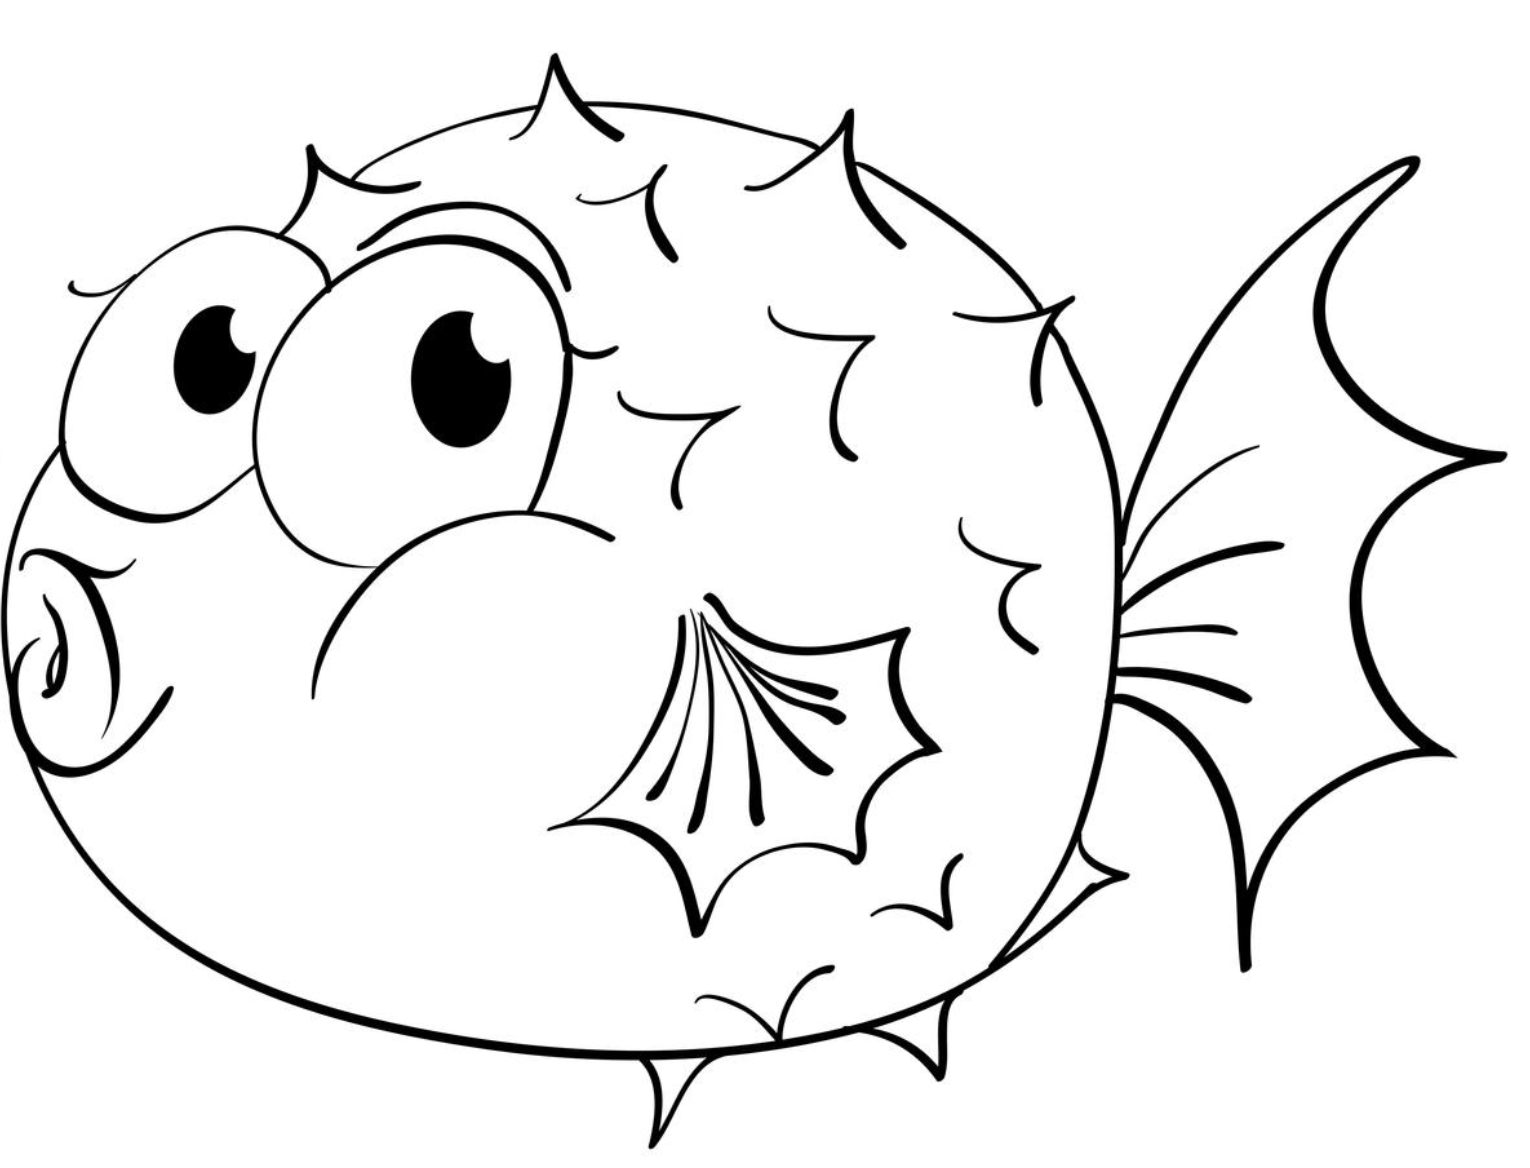

In [1]:
from PIL import Image

chosenAnimal = 'fish'

orininalImage = Image.open('resources/generatedAnimals/originalDoodle/%s.png' % chosenAnimal)
orininalImage

### Extract shape of contour

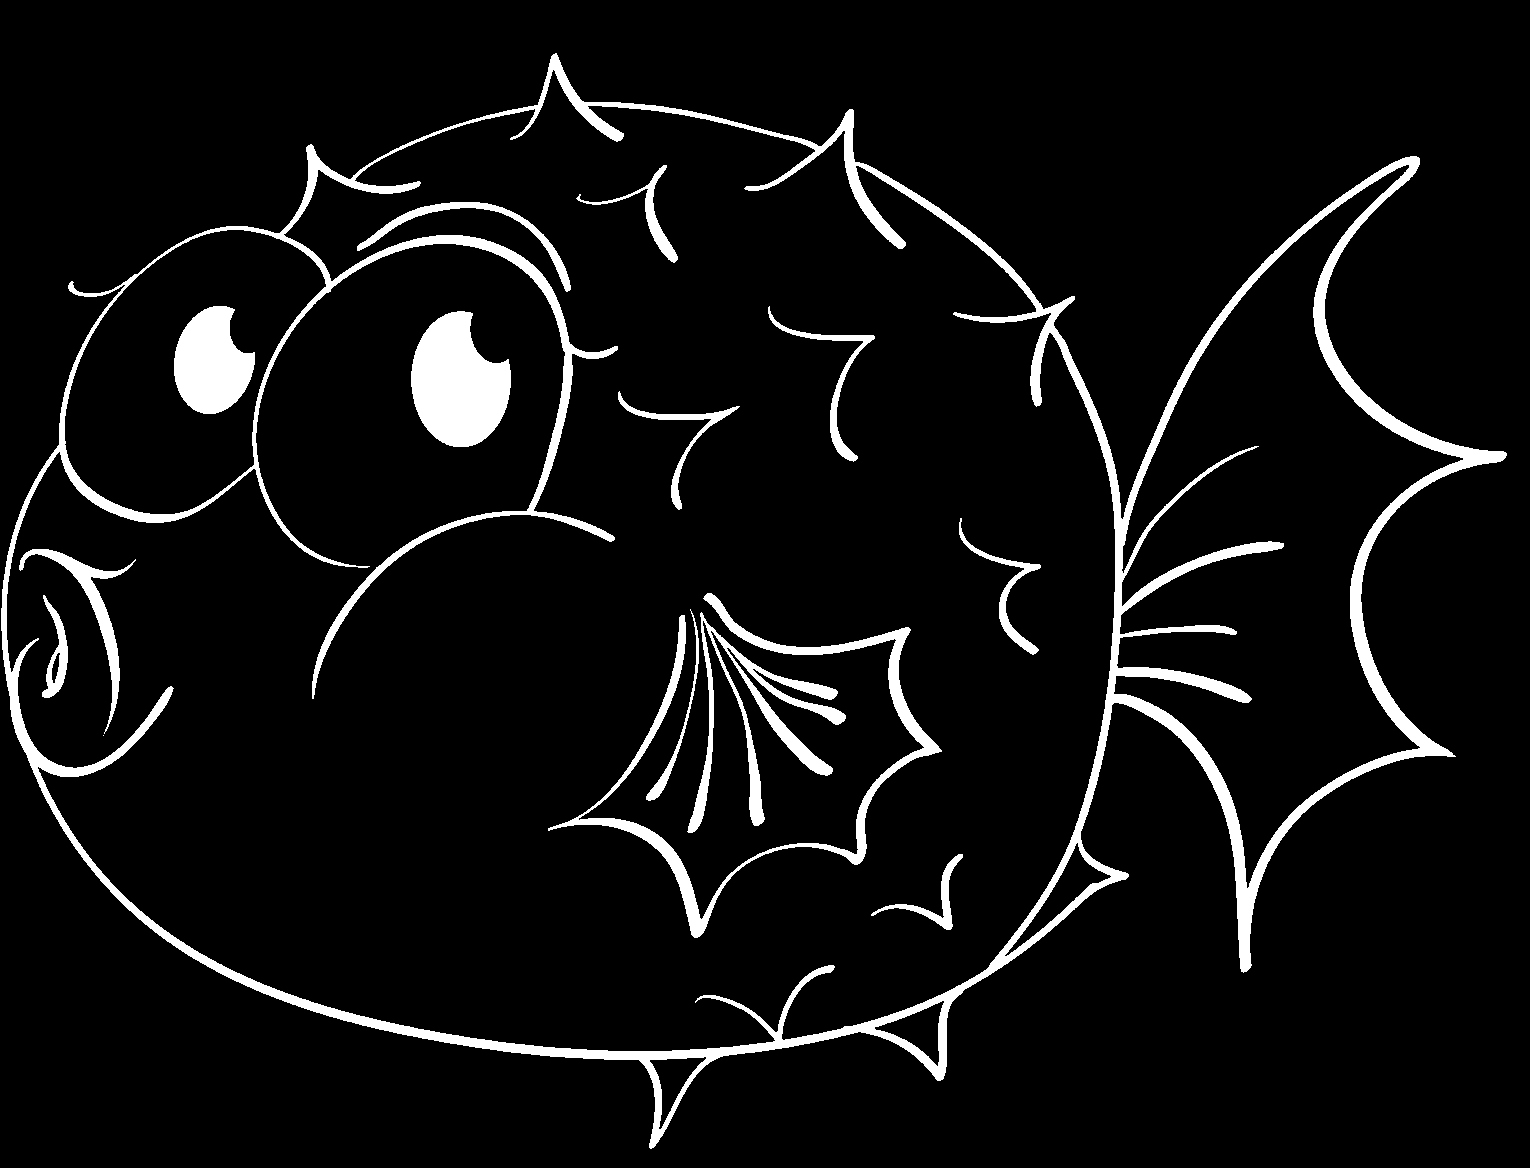

In [2]:
import numpy as np

image = orininalImage.convert('L').point(lambda x : 0 if x > 100 else 255).convert('1')

img = np.rot90(np.asarray(image), k=3)
width, height = img.shape
possiblePositions = list(zip(*np.where(img)))

image

### Horizontal scan and select a random value from contour

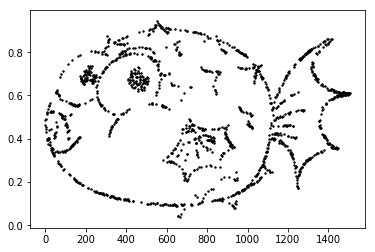

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

sampleAndScale = lambda gr: gr['y'].sample().values[0] / height

data = pd.DataFrame(possiblePositions, columns=['x', 'y']).groupby('x').apply(sampleAndScale)
data = data.reindex(np.arange(0, width), fill_value=-10)

data = data[data > 0]
numbPoints = len(data)
data.index = range(numbPoints)

plt.scatter(range(numbPoints), data, color='k', s=2)

### Import all relevant functions and set value of $\tau$

In [5]:
# set tau = 12

from helperFunctions import *

In [6]:
decimalInitial = findInitialCondition(data)

significance = 18072 bits ; 5439 digits (base-10) ; ratio = 3.323



In [7]:
decimalInitial

mpf('0.463406004800666824557593855105990137975396830788788799406429850812968857479514664226243283412526409224323053889329298620674884680614807653801245428919469308172373079322942641202360227578650007223754688896274934988359055383391758293829850434221470982725457359735022532687338511215494901190517834248451285448265371842708045988617035143856167856768582712340813475364570765704579166741118247811907635019198298917217966489107005859347895741438098657205725178271205479197856561037850672129879522515242161264177216257603491080104890743488241655959581874875973354412021850054165797450158223626434843750018638394983196265959603741802793794915427812829783700519044210441213544190602691506293080715968721154985410290873209165113766170134472432472411734812521843264588709842122557905794635100665691959622368502621163462028898131228949982996187469919064379211503505076645956428128534040783841271402054360825578024834290345310790390157764201292608019533762281506986732260967062668290860118506423854754656622

In [8]:
decodedValues = generateData(decimalInitial, len(data))

In [9]:
# decodedValues = list(filter(lambda x: x > 1 / 2 ** tau, decodedValues))

colorMap = {'elephant': 'darkblue', 'bird': 'darkorange', 'turtle': 'darkgreen', 'fish': 'red'}

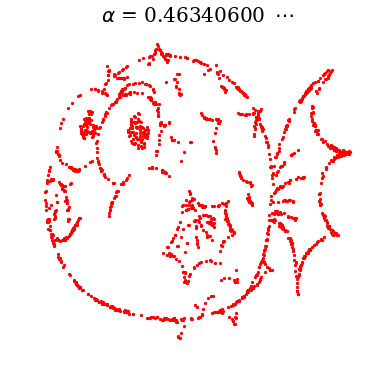

In [10]:
plt.figure(figsize=(6, 6))
plt.title(r'$\alpha$ = %.8f $\, \cdots$' % float(decimalInitial), {'size': 20, 'fontname':'serif'})
# darkgreen ; darkblue ; darkorange ; red
plt.scatter(range(len(decodedValues)), decodedValues, color=colorMap[chosenAnimal], s=5)
plt.axis('off');

from matplotlib import pyplot as mp

mp.savefig('resources/generatedAnimals/%s.png' % chosenAnimal, bbox_inches='tight')